In [1]:
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


Sample X values:
 [[0.41505006]
 [1.02577337]
 [0.11757253]
 [0.03307281]
 [1.51767573]]

Sample y values:
 [[1.54374714]
 [3.15180017]
 [0.55080483]
 [2.08863393]
 [3.33607461]]


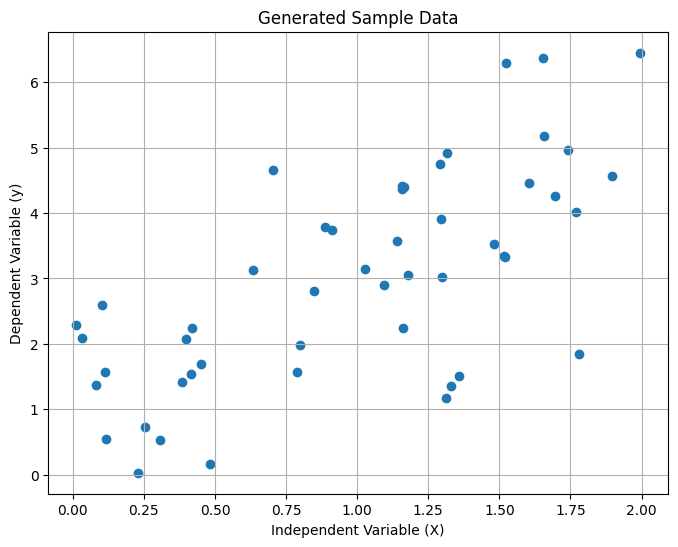

In [2]:
# Set a seed for reproducibility
np.random.seed(501)

# Generate independent variable (X) - 50 data points
X = 2 * np.random.rand(50, 1) # 50 random numbers between 0 and 2

# Generate dependent variable (y) based on y = 2x + 1 + Gaussian noise
y = 1 + 2 * X + np.random.randn(50, 1) # randn gives standard normal distribution noise

# Let's see the first 5 pairs
print("Sample X values:\n", X[:5])
print("\nSample y values:\n", y[:5])

# Basic visualization of the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.title("Generated Sample Data")
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.grid(True)
plt.show()

In [3]:
# Calculate the mean of X and y
x_mean = np.mean(X)
y_mean = np.mean(y)

print(f"Mean of X (x̄): {x_mean:.4f}")
print(f"Mean of y (ȳ): {y_mean:.4f}")

Mean of X (x̄): 0.9895
Mean of y (ȳ): 2.9971


In [4]:
# Calculate the terms needed for the slope formula
numerator = 0
denominator = 0

# Use .shape[0] to get the number of data points (rows)
n = X.shape[0]

for i in range(n):
    numerator += (X[i] - x_mean) * (y[i] - y_mean)
    denominator += (X[i] - x_mean)**2

# Calculate slope (m)
m = numerator / denominator

# Calculate intercept (c)
c = y_mean - m * x_mean

# Note: Ensure m and c are scalar values if they come out as arrays
m = m.item() # Extracts the scalar value if m is a 0-dim array
c = c.item() # Extracts the scalar value if c is a 0-dim array


print(f"Calculated Slope (m): {m:.4f}")
print(f"Calculated Intercept (c): {c:.4f}")
print(f"\nOur linear regression model is: y = {m:.4f}x + {c:.4f}")

Calculated Slope (m): 1.9508
Calculated Intercept (c): 1.0669

Our linear regression model is: y = 1.9508x + 1.0669


In [5]:
def predict(x_input, slope, intercept):
  """Predicts y values based on the linear model."""
  return slope * x_input + intercept

# Let's predict y values for our original X data
y_pred = predict(X, m, c)

# Display the first 5 actual vs predicted values
print("Actual y values (first 5):\n", y[:5].flatten())
print("\nPredicted y values (first 5):\n", y_pred[:5].flatten())

Actual y values (first 5):
 [1.54374714 3.15180017 0.55080483 2.08863393 3.33607461]

Predicted y values (first 5):
 [1.87655745 3.06797569 1.29622894 1.13138422 4.02759426]


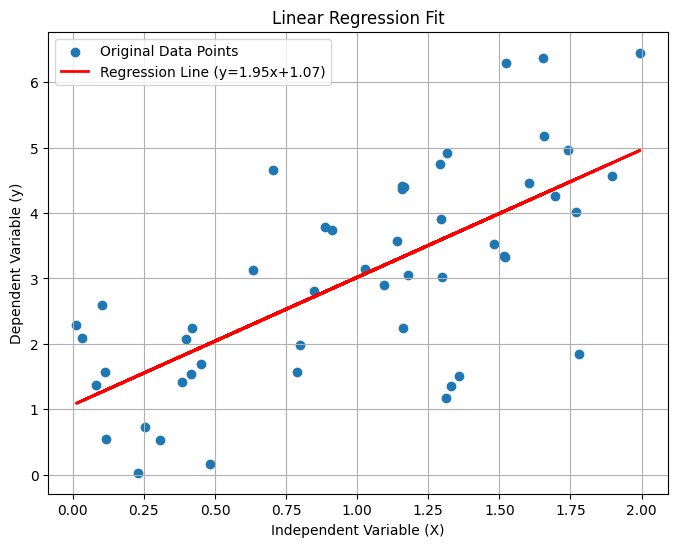

In [6]:
# Plotting the original data points
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Original Data Points')

# Plotting the regression line
# We use the calculated m and c to draw the line across the range of X values
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Regression Line (y={m:.2f}x+{c:.2f})')

plt.title("Linear Regression Fit")
plt.xlabel("Independent Variable (X)")
plt.ylabel("Dependent Variable (y)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Calculate the errors (residuals)
errors = y - y_pred

# Calculate Mean Squared Error (MSE)
mse = np.mean(errors**2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Lower RMSE generally indicates a better fit to the data.

Mean Squared Error (MSE): 1.3518
Root Mean Squared Error (RMSE): 1.1627
